# Drowsiness Detection Model

This notebook aims to create a Drowsiness Detection model using a ResNet Model. The model classifies images into the following categories:

1. Eyes closed
2. Eyes open



## Importing Libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.optimizers import Adam,SGD
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.applications import MobileNetV2

## Dataset

The Drowsiness Detection Dataset includes sequences of eye images with labels indicating whether the eyes are open or closed. The dataset is diverse and captures subjects of varying demographics under controlled driving scenarios.

## Data Loading and Preprocessing

The dataset is loaded using Kaggle API, and the eye images are preprocessed.

In [2]:
# Upload your Kaggle API key (kaggle.json) file
from google.colab import files
files.upload()

# Move the Kaggle API key to the required directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d hazemfahmy/openned-closed-eyes
!unzip -q openned-closed-eyes.zip -d dataset-folder

Saving kaggle.json to kaggle.json
100% 525M/526M [00:15<00:00, 42.1MB/s]
100% 526M/526M [00:15<00:00, 35.8MB/s]


In [3]:
train_data_path = '/content/dataset-folder/TrainingSet/TrainingSet'
test_data_path = '/content/dataset-folder/TestSet/TestSet'

In [23]:
training_data = keras.preprocessing.image_dataset_from_directory(
    test_data_path,
    batch_size=16,
    image_size=(224, 224),
    shuffle=True,
    seed=123,
    subset='training',
    validation_split=0.15
)

test_data = keras.preprocessing.image_dataset_from_directory(
    train_data_path,
    batch_size=16,
    image_size=(224, 224),
    shuffle=True,
    seed=123,
    validation_split=0.85,
    subset='validation'
)


Found 4232 files belonging to 2 classes.
Using 3598 files for training.
Found 1704 files belonging to 2 classes.
Using 1448 files for validation.


## Sample Images
Visualizing a few sample images from the training dataset:

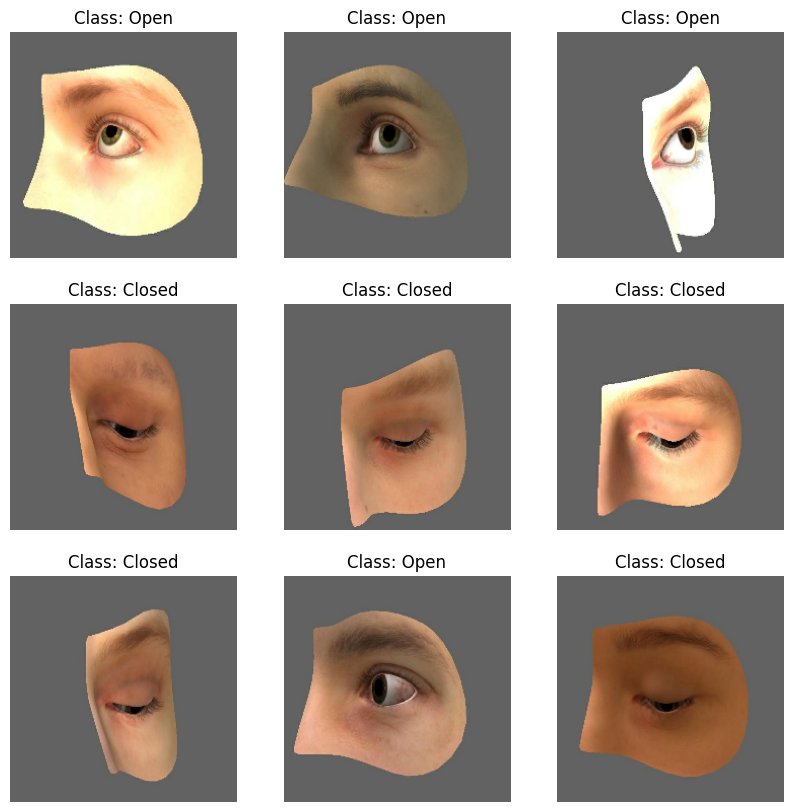

In [5]:
class_mapping = {0: "Closed", 1: "Open"}
plt.figure(figsize=(10, 10))
for images, labels in training_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        text_label = class_mapping[labels[i].numpy()]

        plt.title(f"Class: {text_label}")
        plt.axis("off")
plt.show()

## Model Architecture
The Drowsiness Detection model is built using a Sequential model with a Convolutional Neural Network (CNN) architecture.

The CNN model consists of a pretrained MobileNetV2 base, followed by a Flatten layer, three Dense layers with ReLU activation, and a final Dense layer with Softmax activation for classification into two classes (open or closed).



In [24]:
mobilenet_model = Sequential()
pretrained_mobilenet = MobileNetV2(weights='imagenet', input_shape=(224, 224, 3), include_top=False)
for layer in pretrained_mobilenet.layers:
    layer.trainable = False

mobilenet_model.add(pretrained_mobilenet)
mobilenet_model.add(layers.GlobalAveragePooling2D())
mobilenet_model.add(Dense(512, activation='relu'))
mobilenet_model.add(Dense(2, activation='softmax'))

mobilenet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_2  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_4 (Dense)             (None, 512)               655872    
                                                                 
 dense_5 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 2914882 (11.12 MB)
Trainable params: 656898 (2.51 MB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


## Model Training
The model is compiled using :
*  Loss function : sparse_categorical_crossentropy
*  Optimizer: Adam
*  Evaluation metric : Accuracy
*  Learning Rate :0.0001
*  Epoch: 6
*  Batch size:16




In [25]:
mobilenet_model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

In [26]:
epochs=6
history_mobilenet = mobilenet_model.fit(
    training_data,
    validation_data=test_data,
    epochs=epochs
)

Epoch 1/6
225/225 [==============================] - 16s 57ms/step - loss: 0.2474 - accuracy: 0.9052 - val_loss: 0.2228 - val_accuracy: 0.9185
Epoch 2/6
225/225 [==============================] - 12s 55ms/step - loss: 0.1757 - accuracy: 0.9322 - val_loss: 0.1950 - val_accuracy: 0.9275
Epoch 3/6
225/225 [==============================] - 12s 53ms/step - loss: 0.1595 - accuracy: 0.9408 - val_loss: 0.2116 - val_accuracy: 0.9261
Epoch 4/6
225/225 [==============================] - 12s 53ms/step - loss: 0.1502 - accuracy: 0.9433 - val_loss: 0.2289 - val_accuracy: 0.9171
Epoch 5/6
225/225 [==============================] - 11s 49ms/step - loss: 0.1405 - accuracy: 0.9469 - val_loss: 0.2141 - val_accuracy: 0.9240
Epoch 6/6
225/225 [==============================] - 12s 53ms/step - loss: 0.1391 - accuracy: 0.9475 - val_loss: 0.1910 - val_accuracy: 0.9337


## Training and Validation Curves
Visualizing the training and validation loss and accuracy over epochs:

Plot training and validation loss:



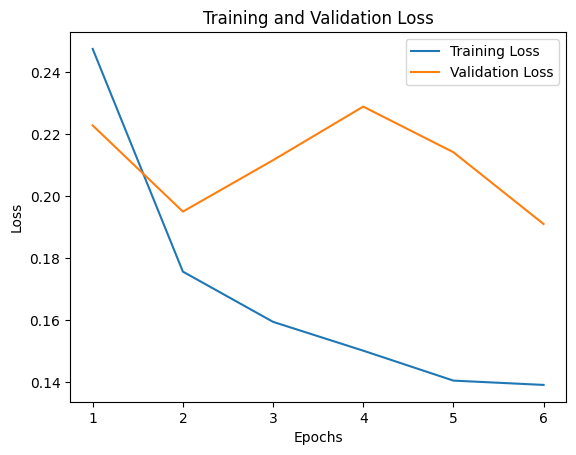

In [28]:
# Loss plot
epochs_range = range(1, epochs + 1)

print("Plot training and validation loss:\n")
plt.figure()
plt.plot(epochs_range, history_mobilenet.history['loss'], label='Training Loss')
plt.plot(epochs_range, history_mobilenet.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

Plot training and validation accuracy:



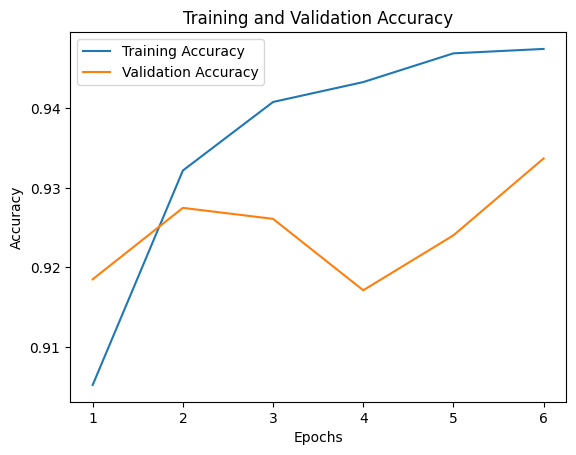

In [29]:
#Accuracy Plot
print("Plot training and validation accuracy:\n")
plt.figure()
plt.plot(epochs_range, history_mobilenet.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history_mobilenet.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

## Model Evaluation
The model's performance is evaluated on a separate test dataset, and accuracy metrics are used.

In [30]:
loss, accuracy = mobilenet_model.evaluate(test_data)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

91/91 [==============================] - 3s 34ms/step - loss: 0.1910 - accuracy: 0.9337
Validation Accuracy: 93.37%


## Visualizing Predictions
Visualizing model predictions on a subset of the test dataset:

1/1 [==============================] - 1s 772ms/step


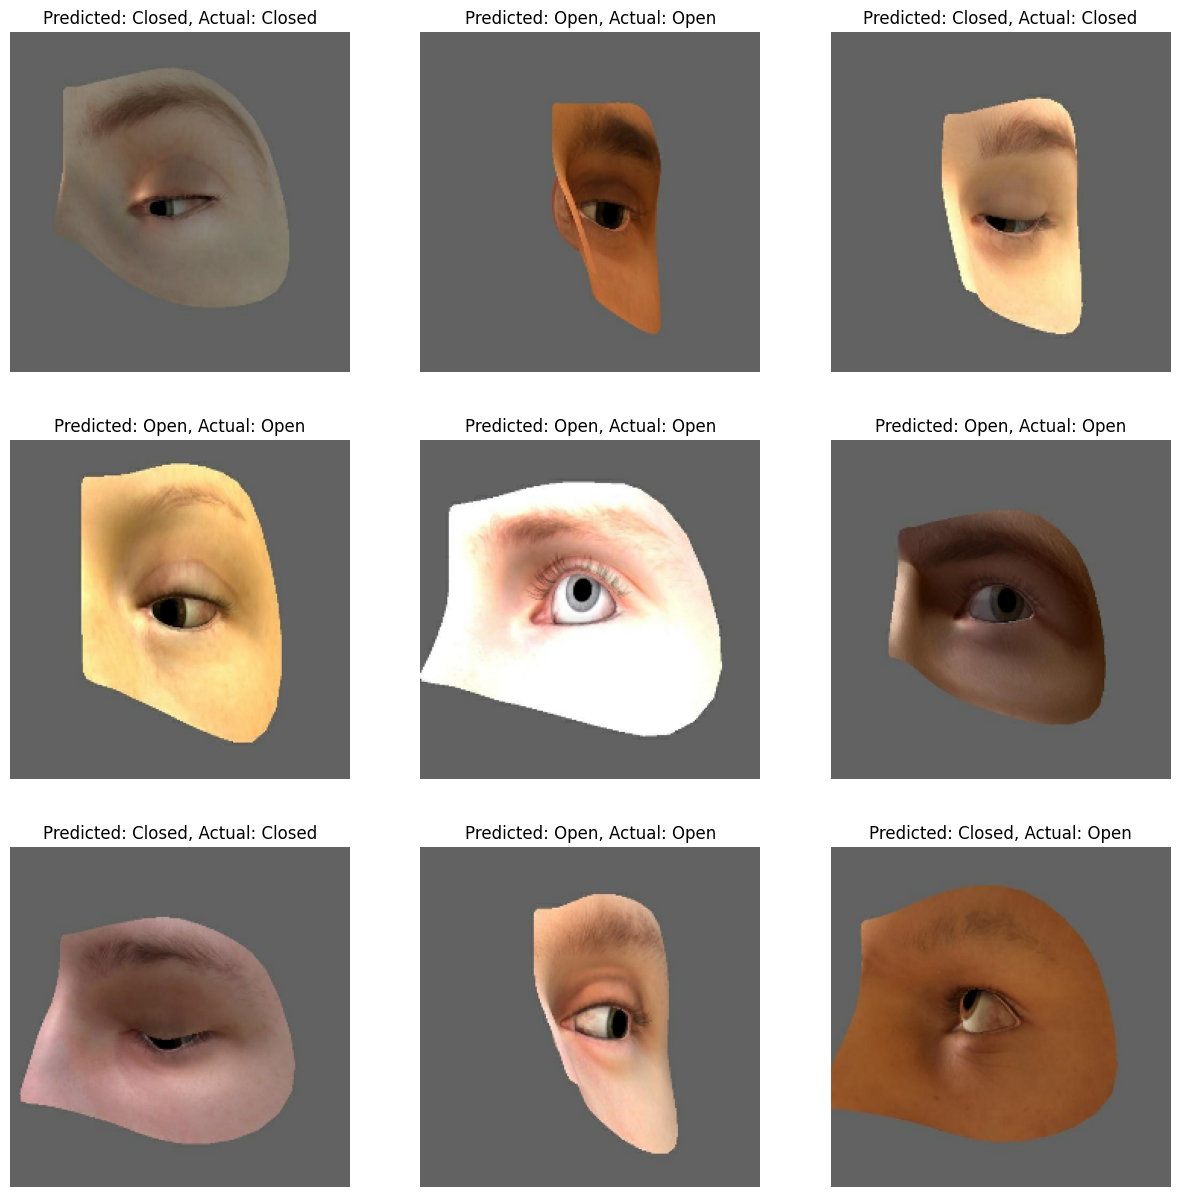

In [31]:
plt.figure(figsize=(15, 15))
for images, labels in test_data.take(1):
    predictions =mobilenet_model.predict(images)
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class = class_mapping[np.argmax(predictions[i])]
        true_class = class_mapping[labels[i].numpy()]

        plt.title(f"Predicted: {predicted_class}, Actual: {true_class}")
        plt.axis("off")
plt.show()